In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


In [2]:
dengue = pd.read_csv("dengue.csv")

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [5]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [6]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [7]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [8]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1>INSIGHTS</h1>

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\383674554.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_monthly = dengue.groupby(['Year', 'Month'])['Dengue_Cases'].sum().unstack()


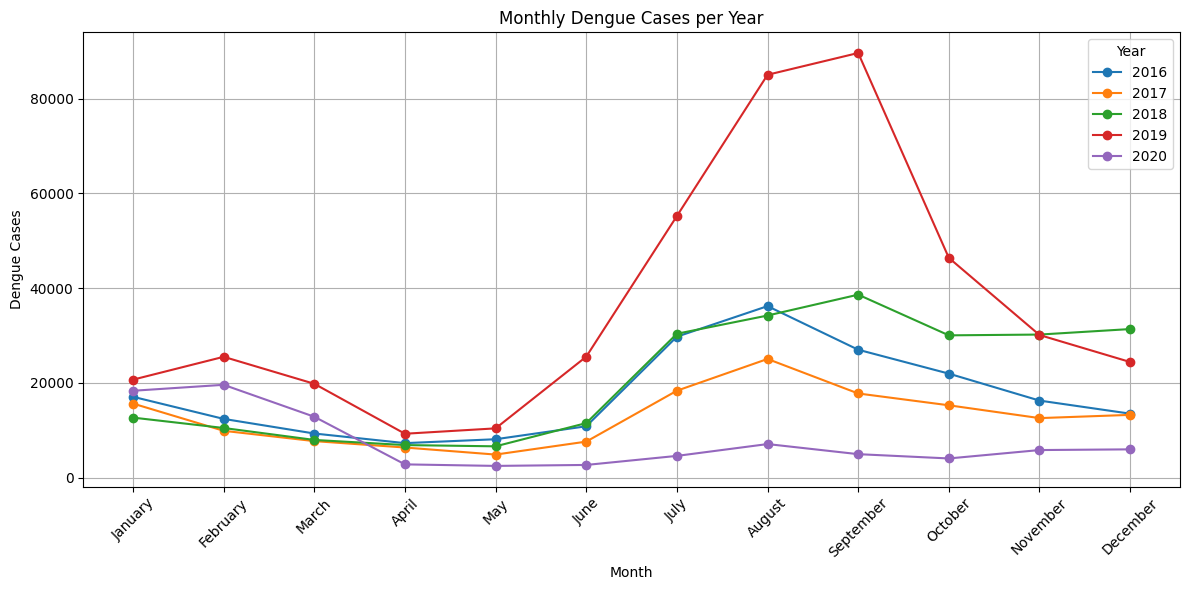

In [28]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

yearly_monthly = dengue.groupby(['Year', 'Month'])['Dengue_Cases'].sum().unstack()
yearly_monthly = yearly_monthly[month_order] 

plt.figure(figsize=(12, 6))
for year in yearly_monthly.index:
    plt.plot(month_order, yearly_monthly.loc[year], marker='o', label=str(year))

plt.title("Monthly Dengue Cases per Year")
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.tight_layout()
plt.grid(True)
plt.show()


<h1>Insight 1</h1>
<h3>Across all years, January to May consistently recorded lower cases, suggesting a natural off-season for dengue. These months are ideal for preventive measures and community education to prepare for the surge in mid-year.</h3>

<h1>Insight 2</h1>
<h3>Year 2020, show flatter curves, indicating better dengue control or lower rainfall that season. These year may serve as models for best practices in mosquito control and health response.</h3>

<h1>Insight 3</h1>
<h3>When comparing 2019 and 2020, it is clear that 2019 recorded the highest number of dengue cases among all the years. In contrast, 2020 showed a significant drop. This may suggest that because of the high outbreak in 2019, preventive measures and interventions were strengthened in 2020, resulting in a flatter curve and fewer recorded cases.</h3>


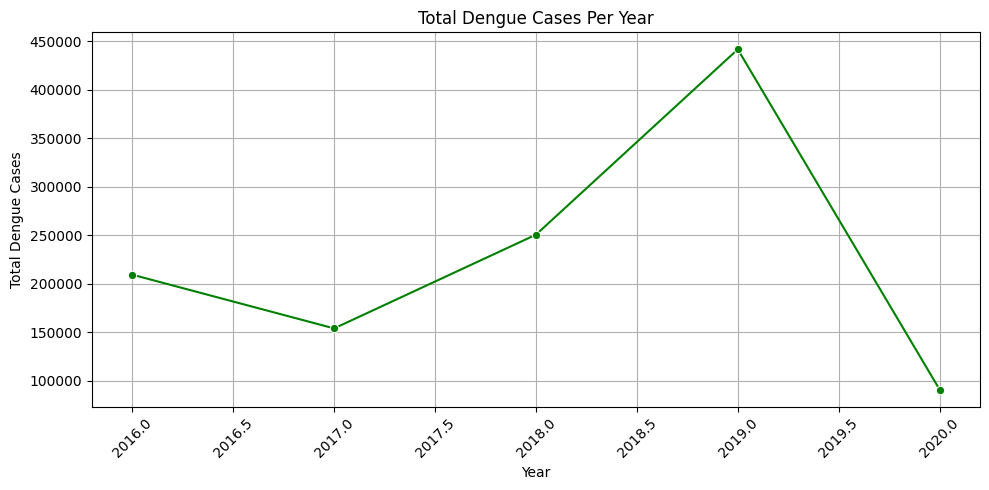

In [27]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_cases.index, y=yearly_cases.values, marker='o', color='green')
plt.title("Total Dengue Cases Per Year")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

<h1>Insight 4</h1>
<h3>Based on the graph showing the total number of dengue cases for each year, it is evident that 2019 had the highest recorded number of cases. This peak could be a result of various factors such as environmental conditions, inadequate control measures, or possibly a more widespread outbreak. 

</h3>


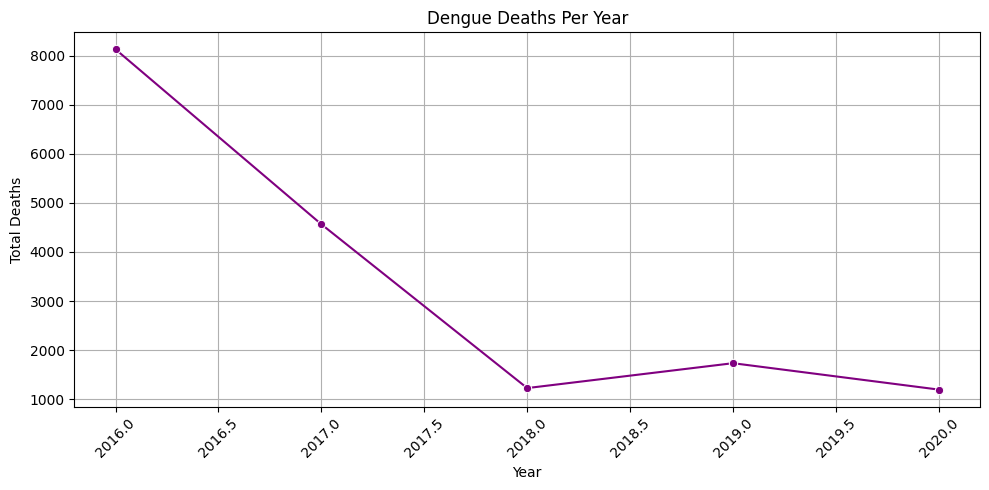

In [26]:

yearly_deaths = dengue.groupby('Year')['Dengue_Deaths'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_deaths.index, y=yearly_deaths.values, marker='o', color='purple')
plt.title("Dengue Deaths Per Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


<h1>Insight 5</h1>
<h3>From 2016 to 2018, the total number of dengue deaths showed a declining trend, with each successive year recording fewer deaths. This reduction may suggest improvements in healthcare responses, better public awareness, or more effective mosquito control programs during this period.
</h3>


<h1>Insight 6</h1>
<h3>It can be inferred that from 2018 onwards, the availability of more effective treatments or medicine for dengue likely contributed to a significant reduction in the number of deaths. This is reflected in the fewer death cases observed between 2018 to 2020.
</h3>


C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\886159998.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_deaths = dengue.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


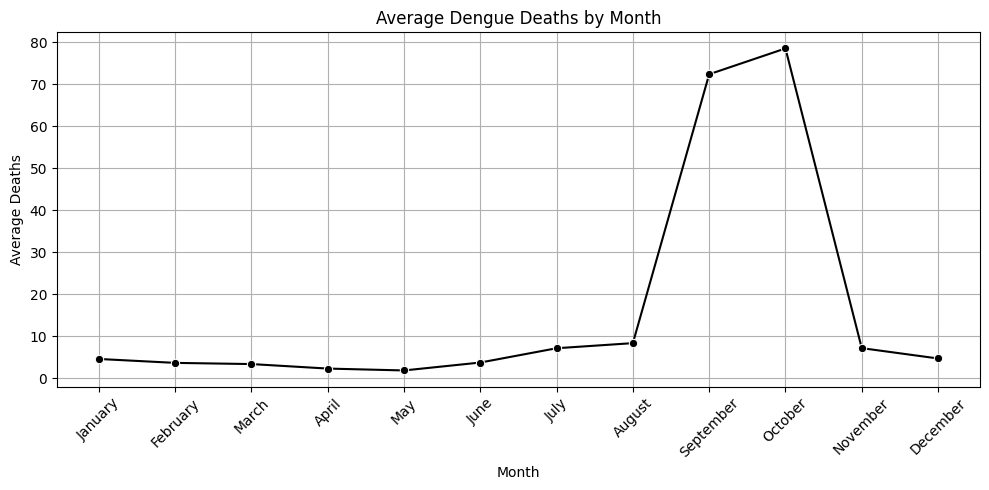

In [25]:
monthly_deaths = dengue.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_deaths.index, y=monthly_deaths.values, marker='o', color='black')
plt.title("Average Dengue Deaths by Month")
plt.ylabel("Average Deaths")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

<h1>INSIGHTS ON DENGUE CASES FOR EACH REGION</h1>

<h1>Insight 7</h1>
<h3>Based on the graph, the average number of dengue-related deaths from January to August remained relatively low. However, there was a noticeable increase in deaths from August to October, which may indicate a seasonal spike in cases or delayed complications during this period. 
</h3>


C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


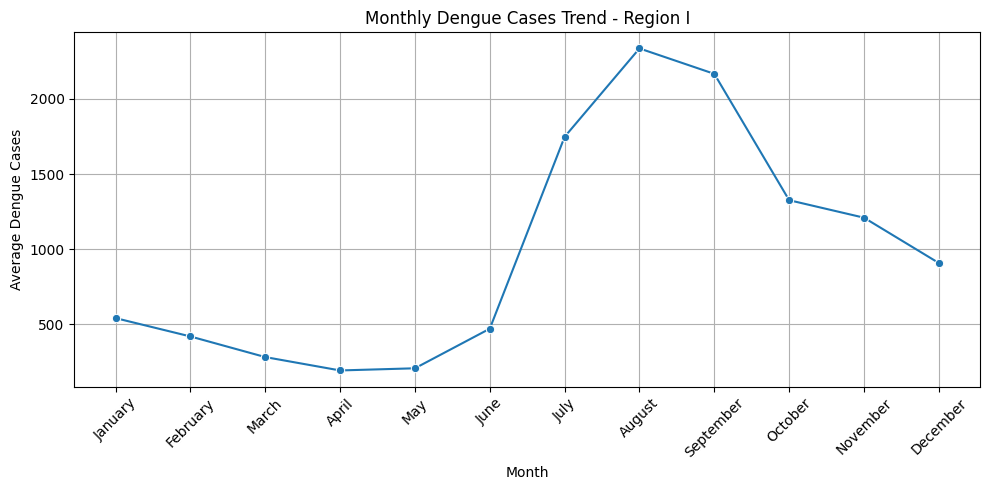

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


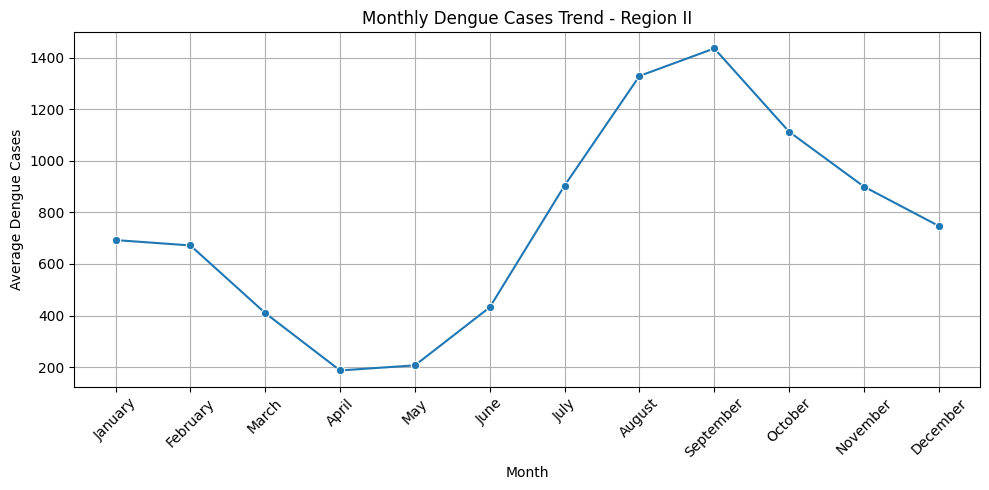

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


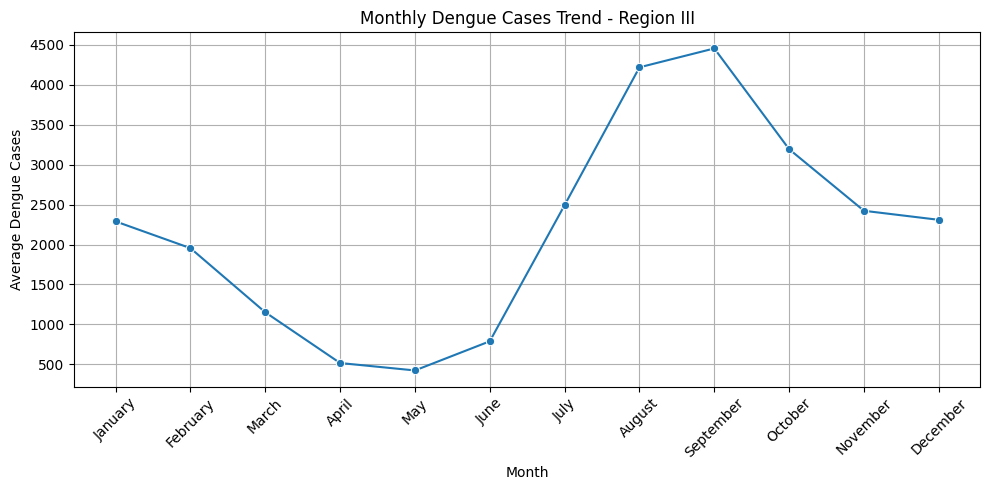

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


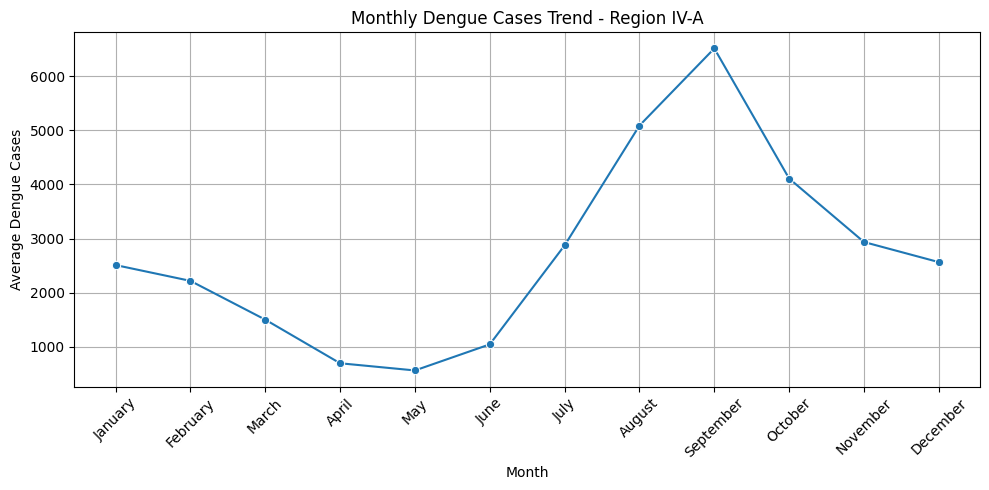

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


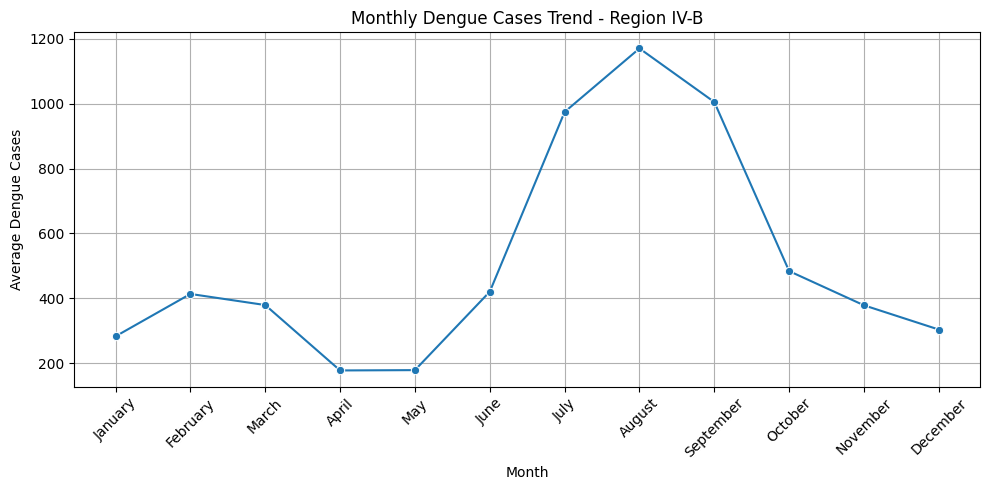

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


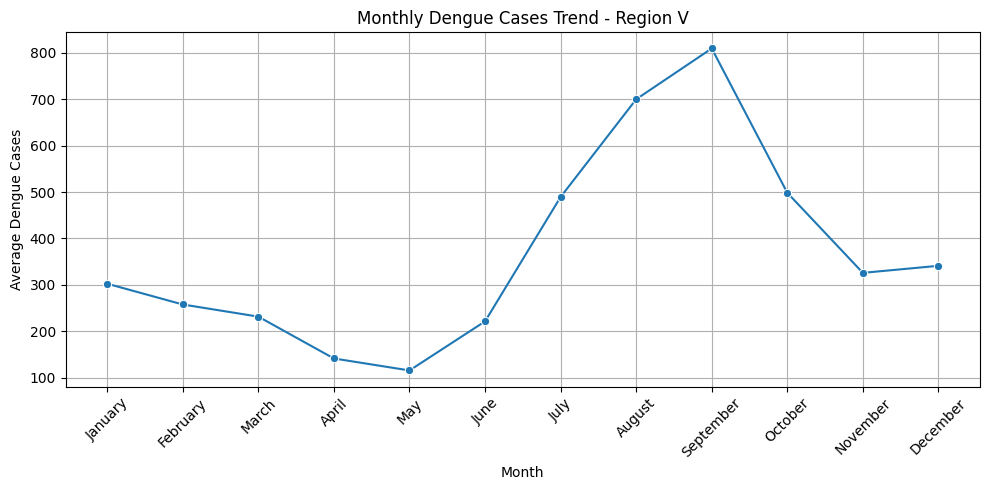

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


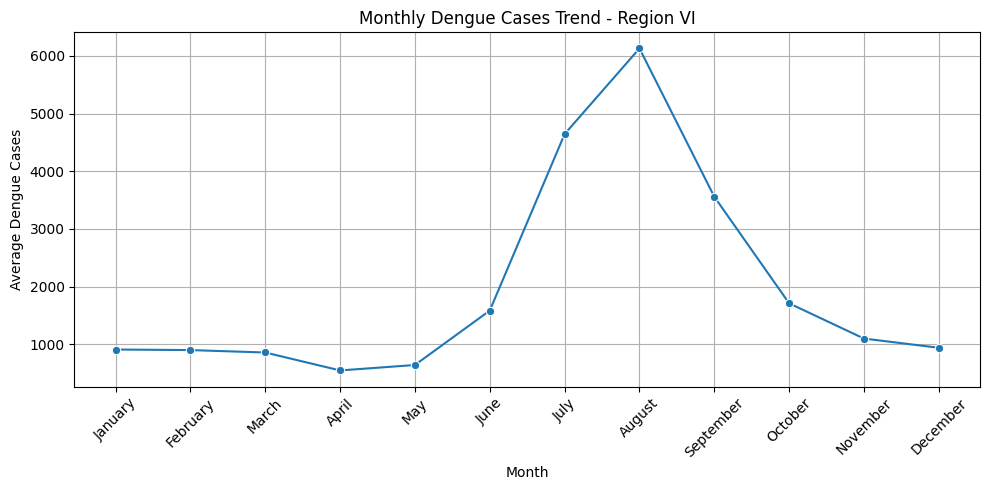

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


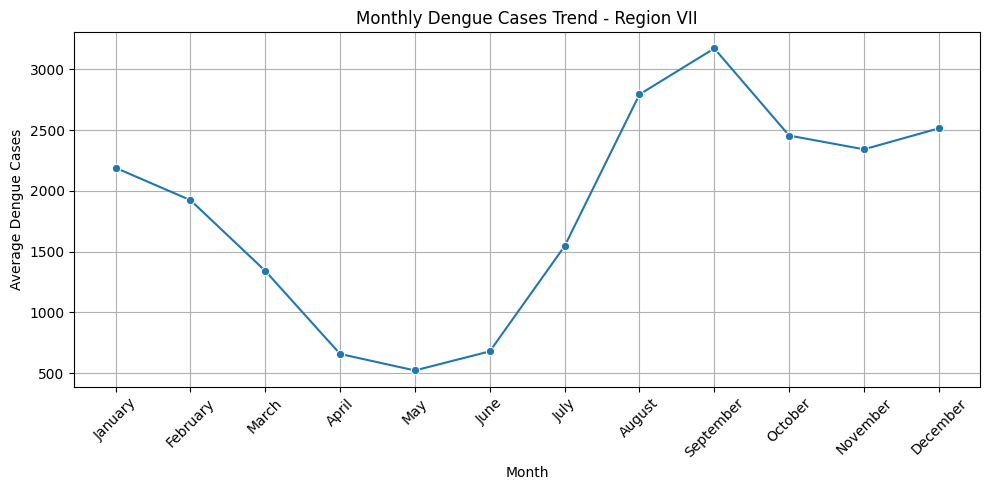

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


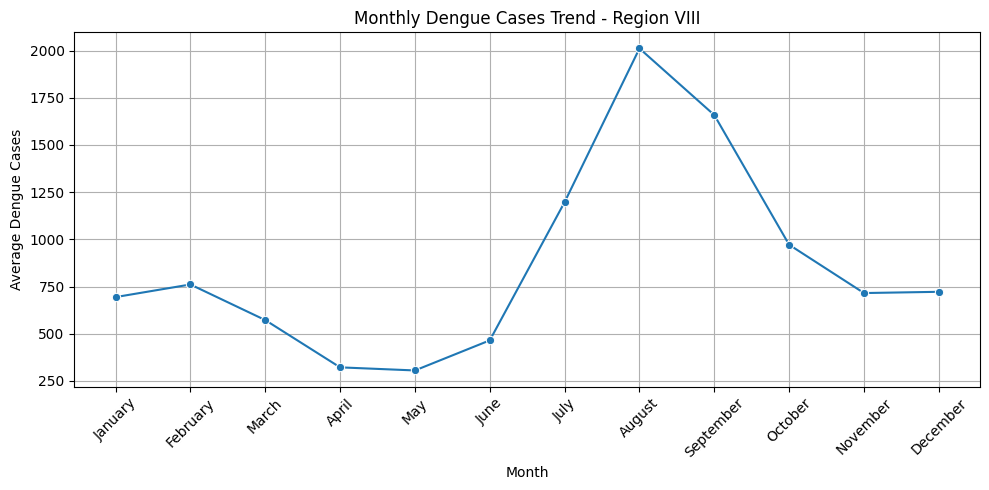

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


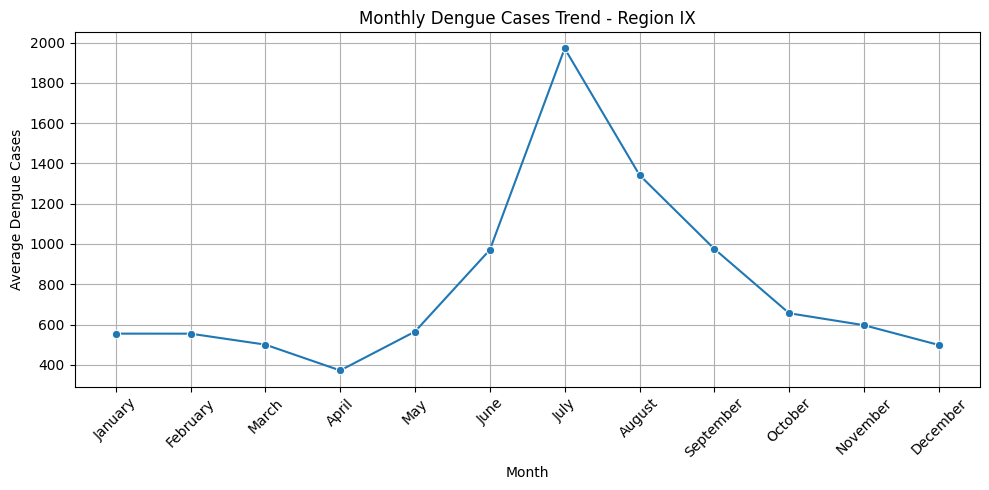

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


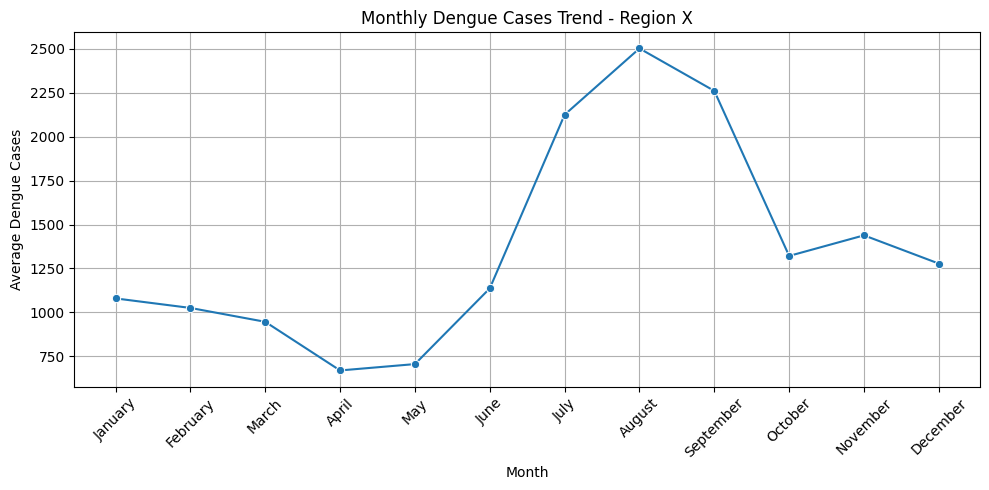

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


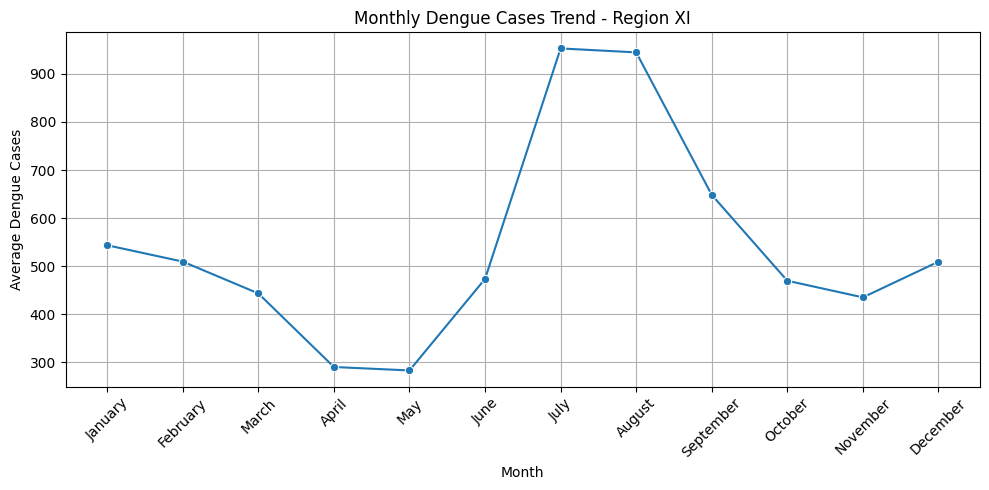

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


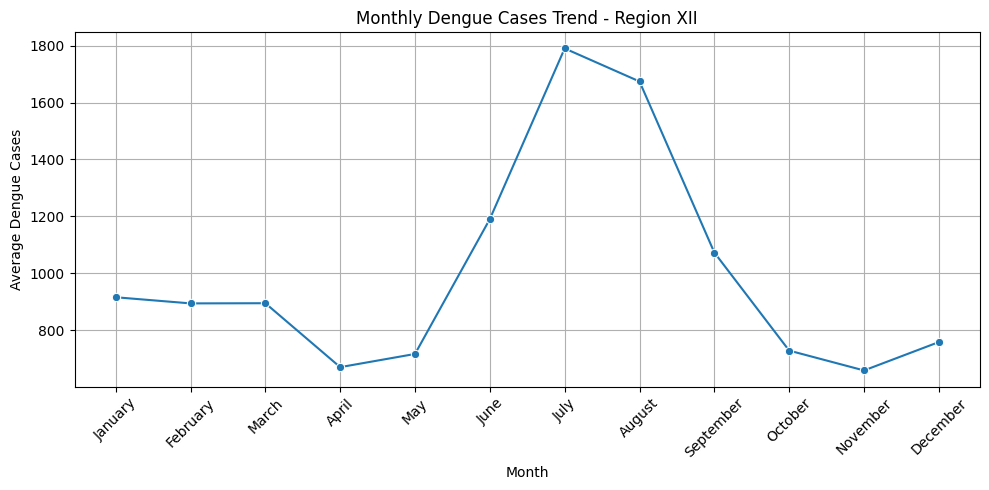

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


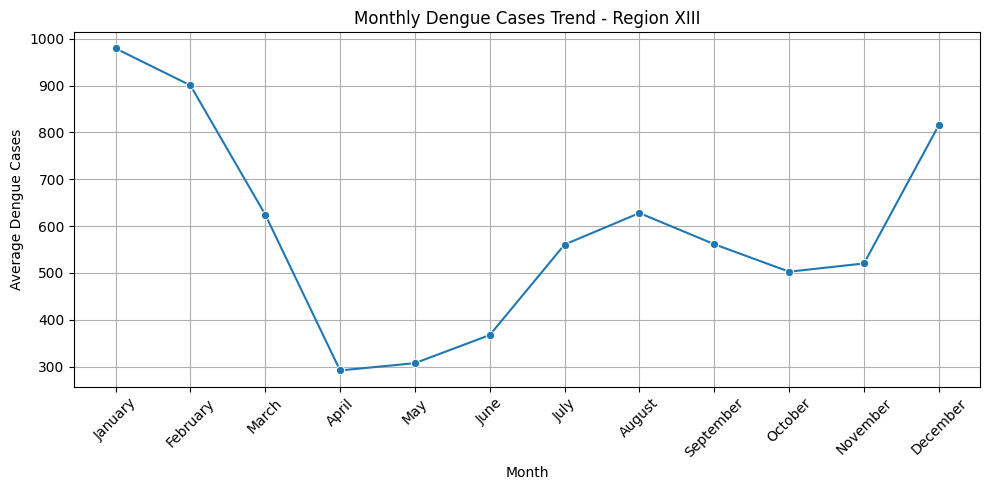

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


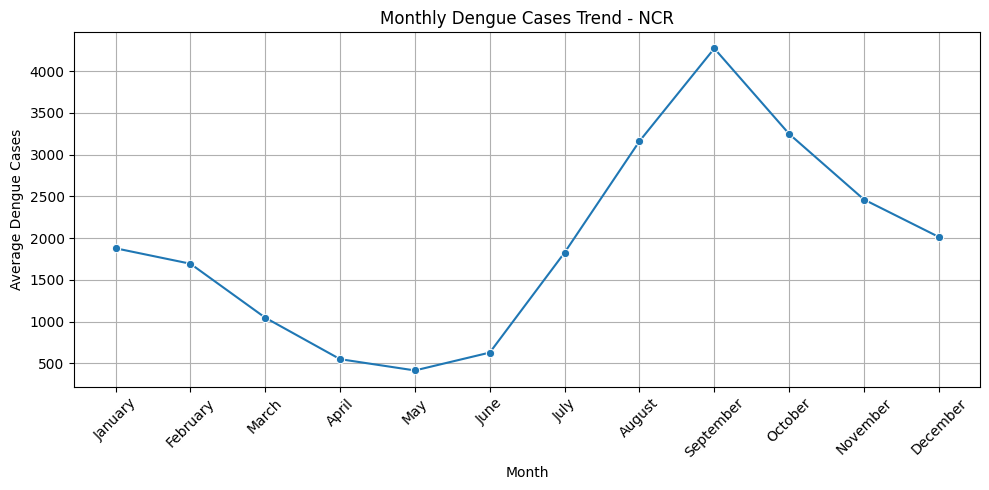

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


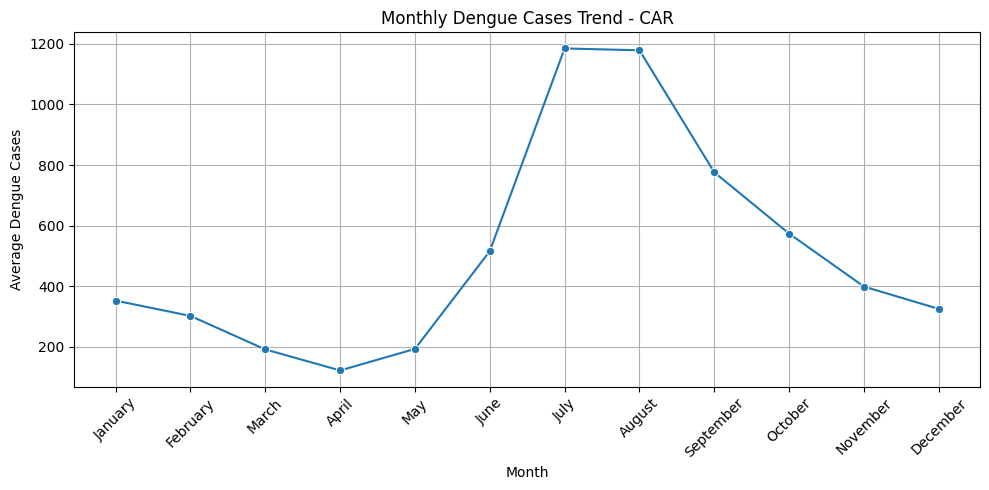

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1069074723.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)


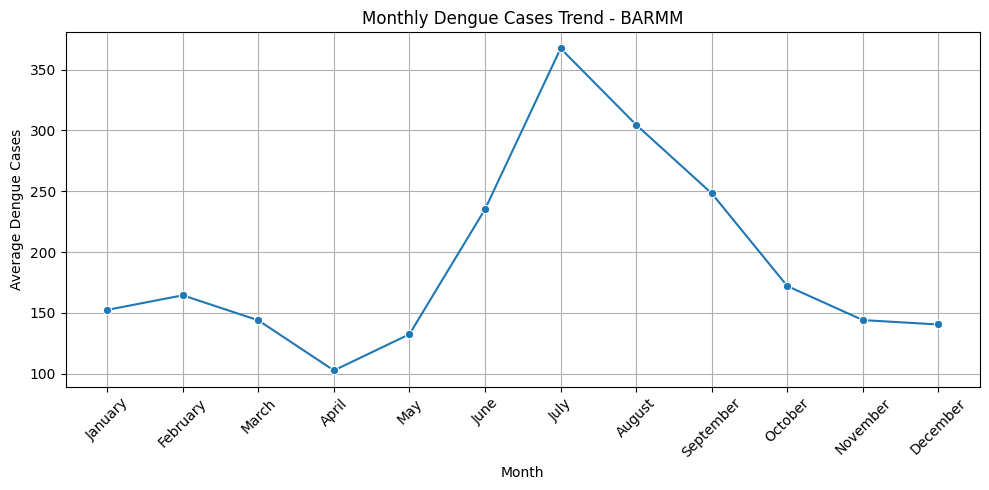

In [24]:

regions = dengue['Region'].unique()

for region in regions:
    region_data = dengue[dengue['Region'] == region]
    monthly_avg = region_data.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
    plt.title(f"Monthly Dengue Cases Trend - {region}")
    plt.xlabel("Month")
    plt.ylabel("Average Dengue Cases")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()


<h1>Insight 8</h1>
<h3>Based on the graphs, most regions recorded their highest number of dengue cases in either August or September, which aligns with the typical rainy season in the Philippines. However, there are notable exceptions:

Regions IX, XI, XII, CAR, and BARMM showed a peak in July, indicating an earlier surge in dengue cases compared to other areas.</h3>

<h1>Insight 9</h1>
<h3>
Region XIII was the only region where the highest average number of cases occurred in January, suggesting a different transmission pattern that may be influenced by local climate or environmental factors.
</h3>


<h1>INSIGHTS ON DENGUE DEATHS FOR EACH REGION</h1>

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


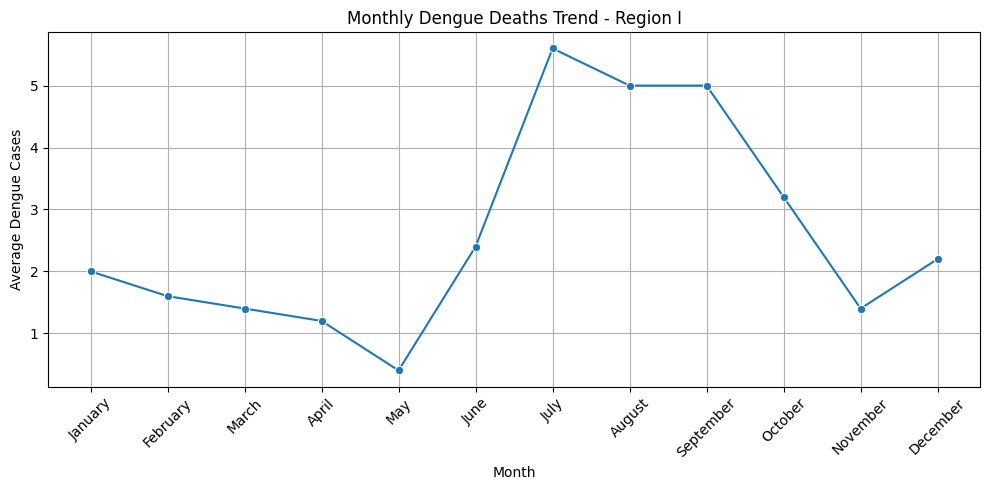

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


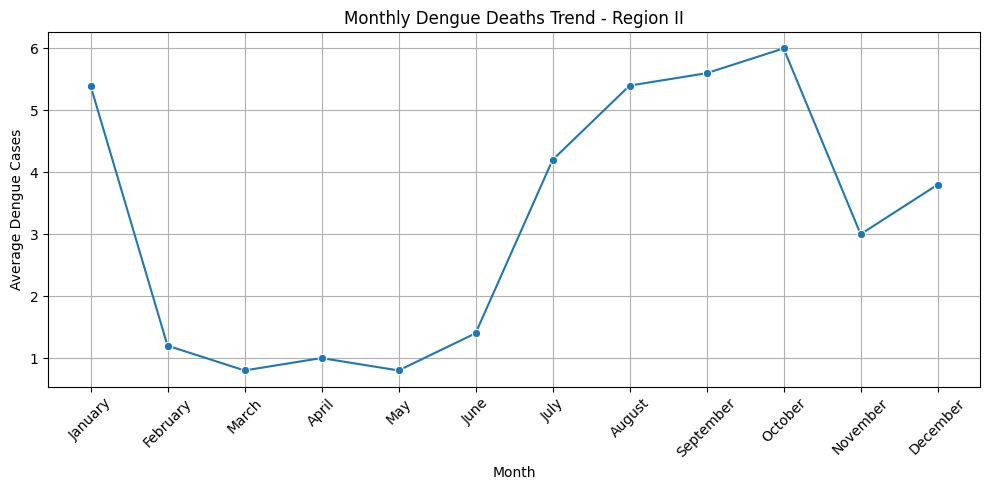

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


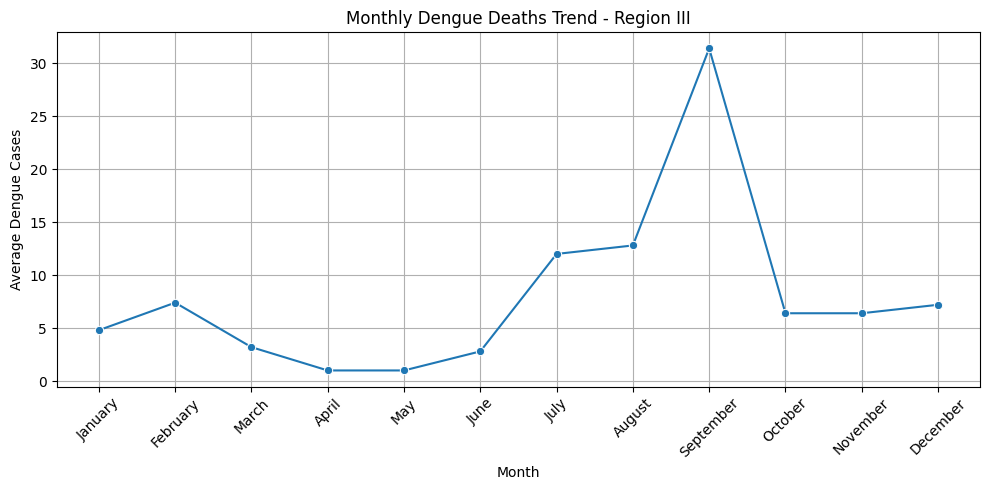

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


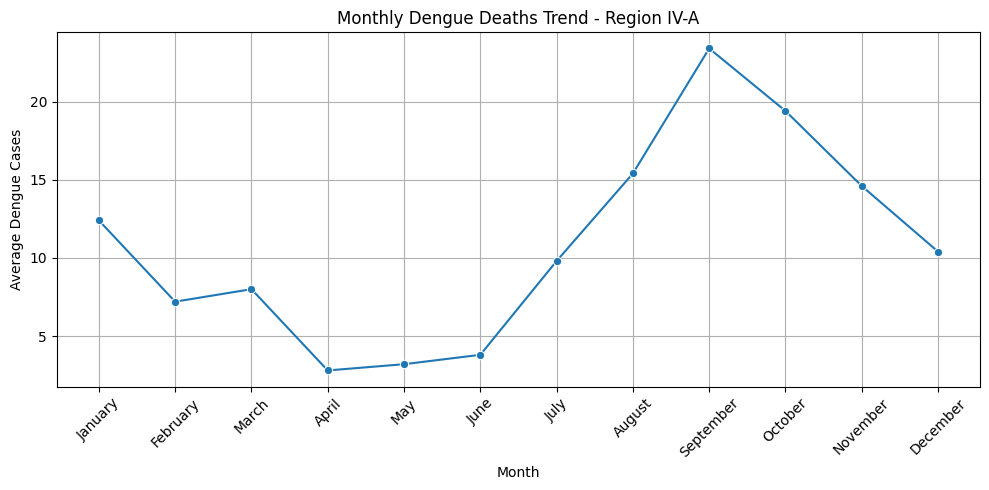

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


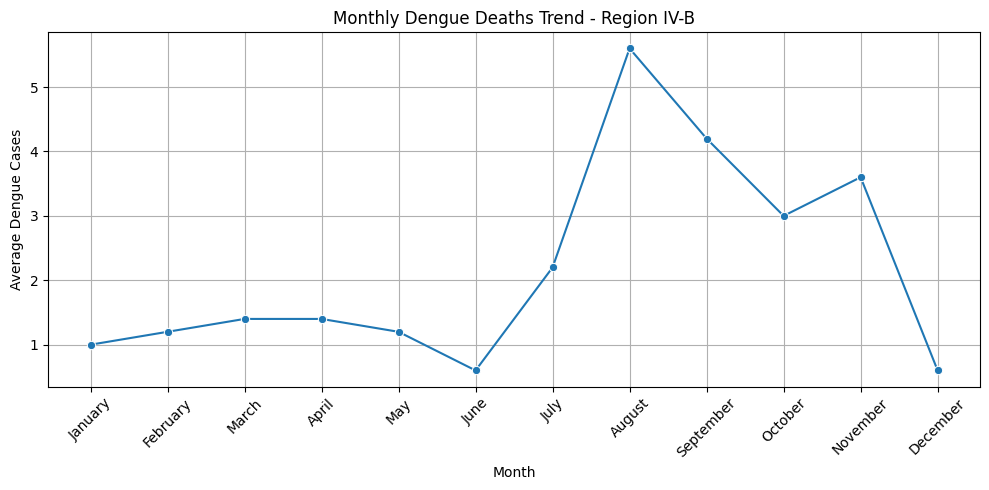

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


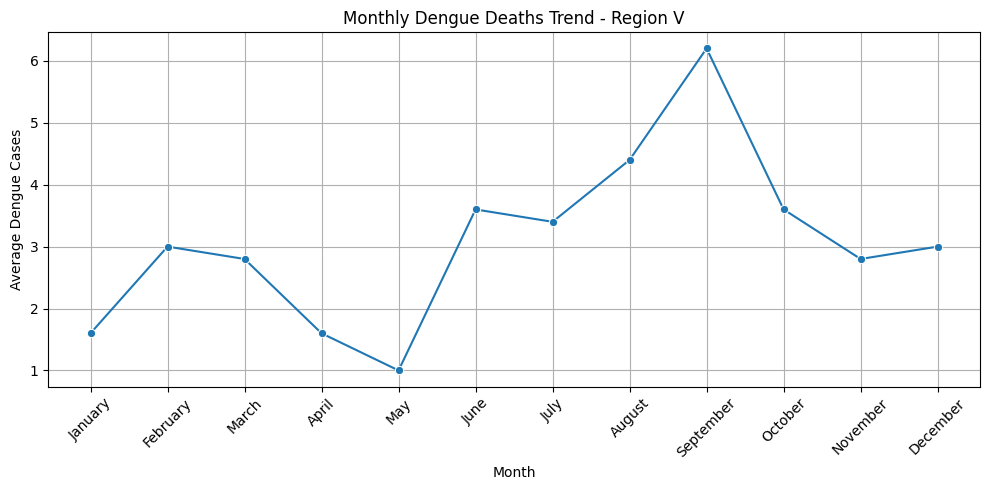

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


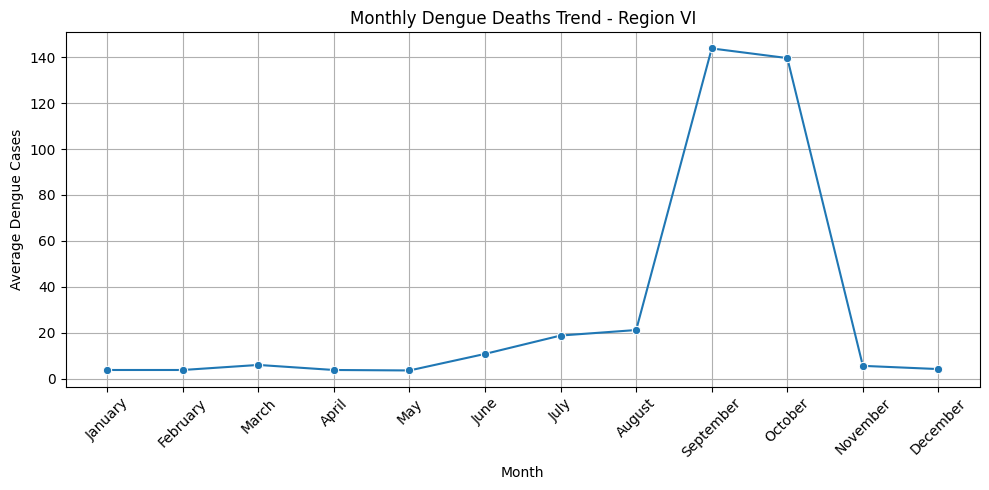

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


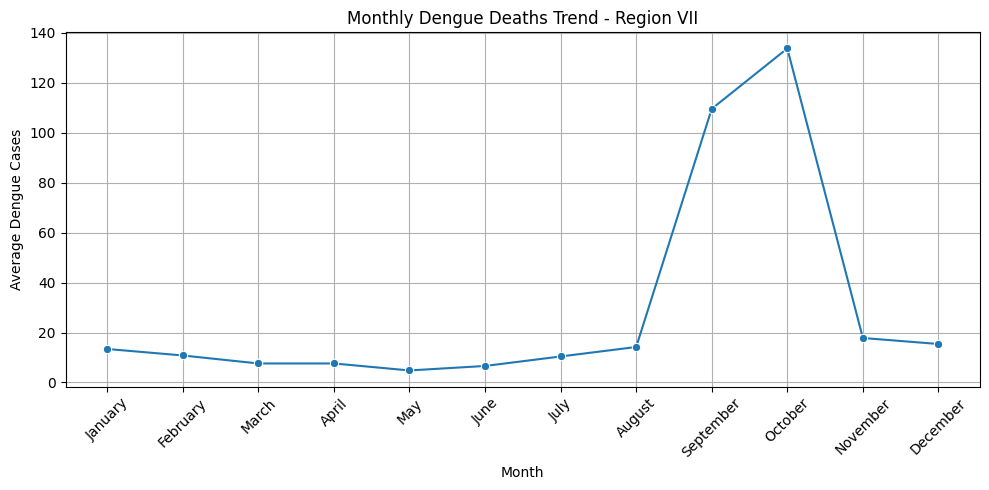

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


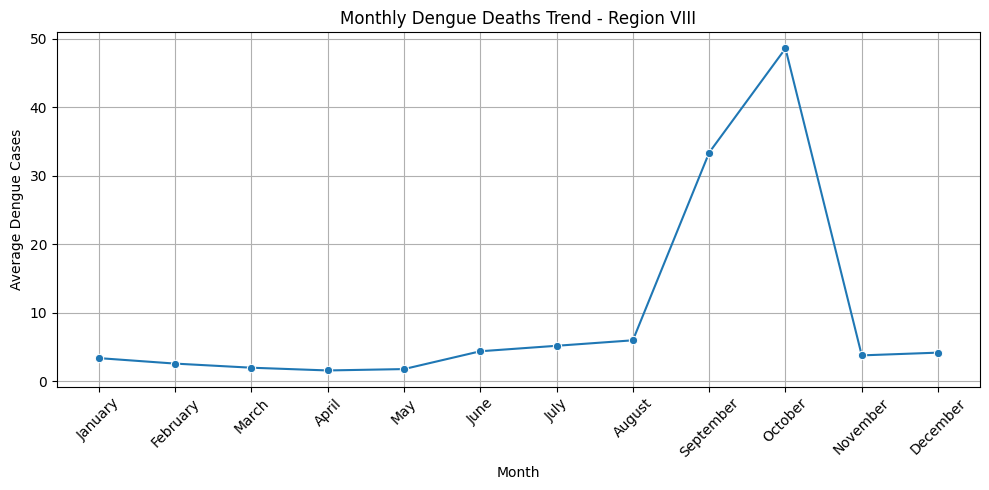

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


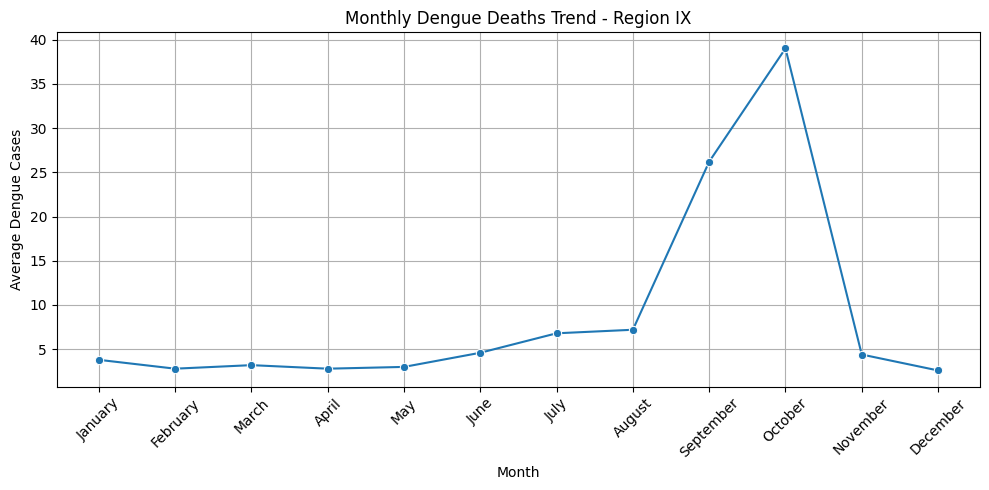

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


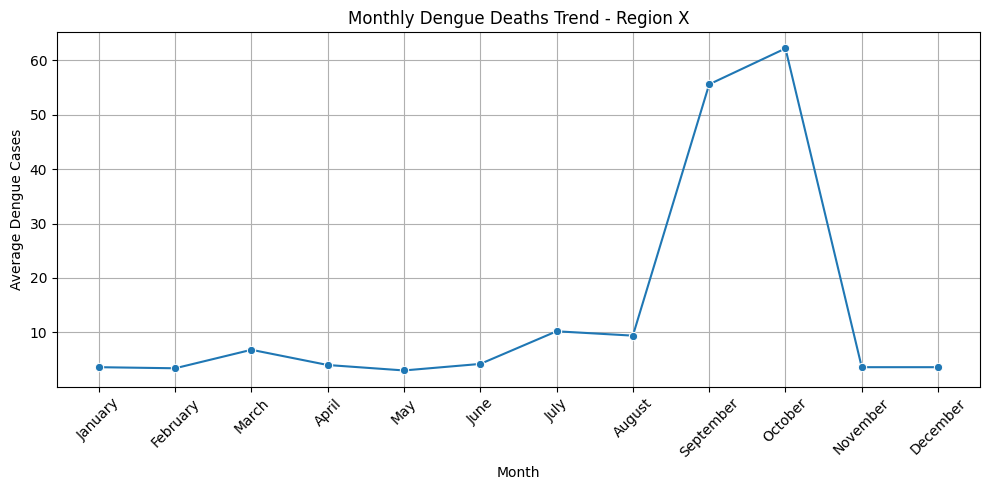

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


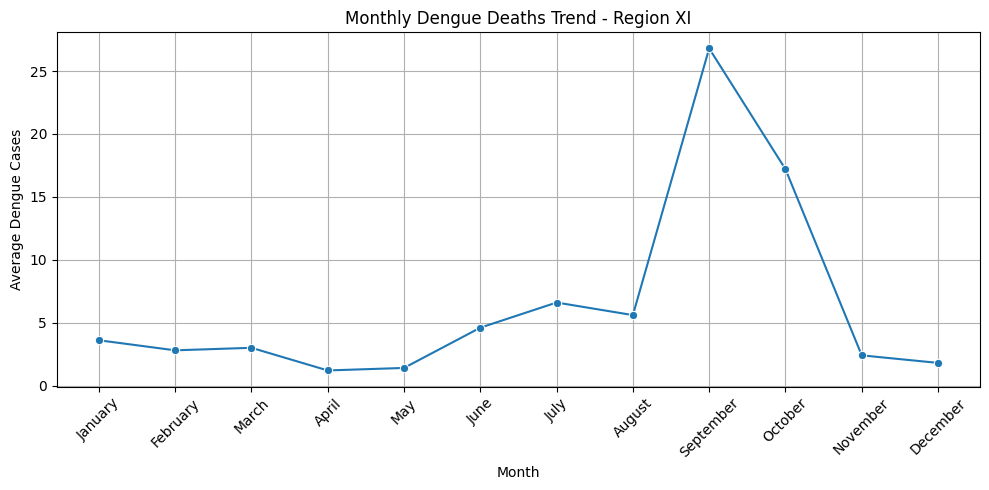

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


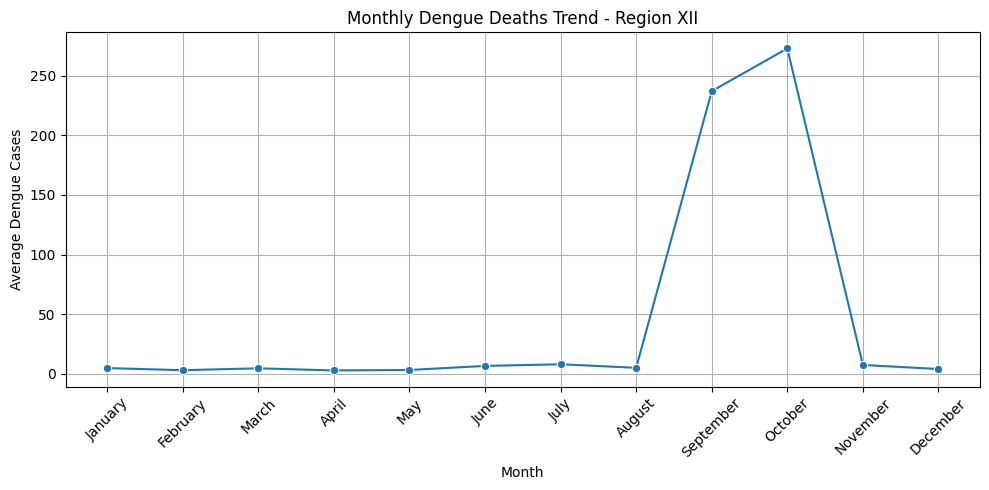

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


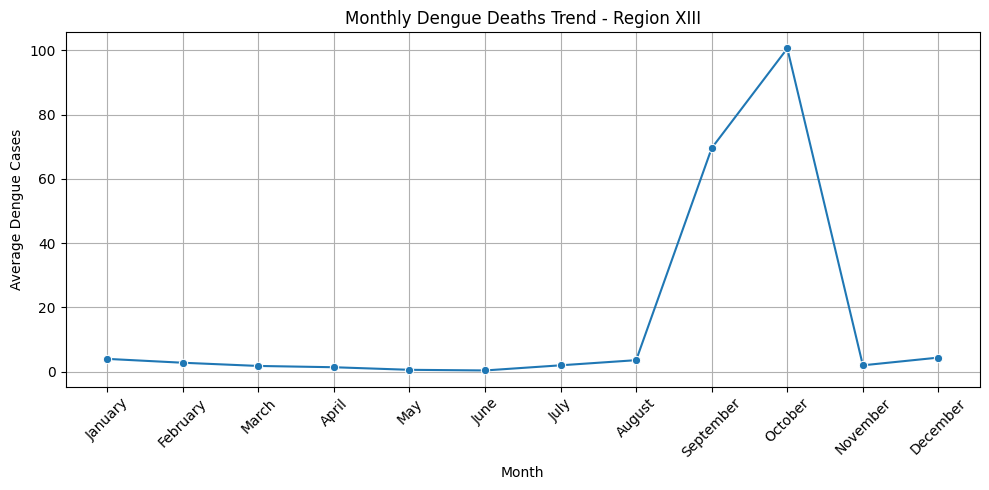

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


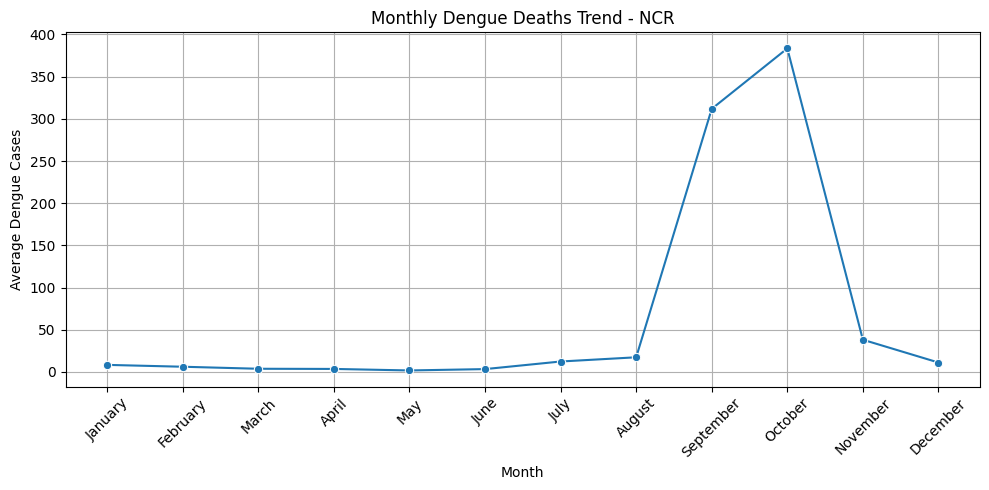

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


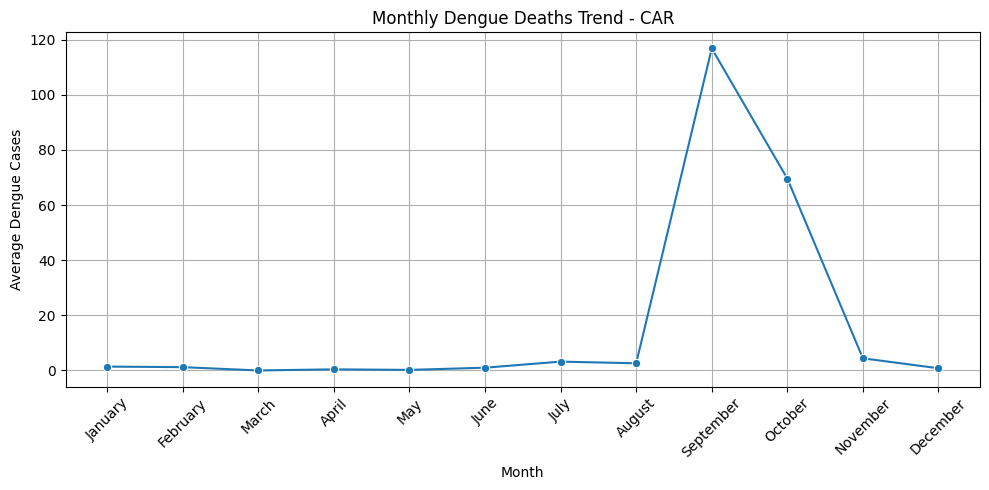

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\734582024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)


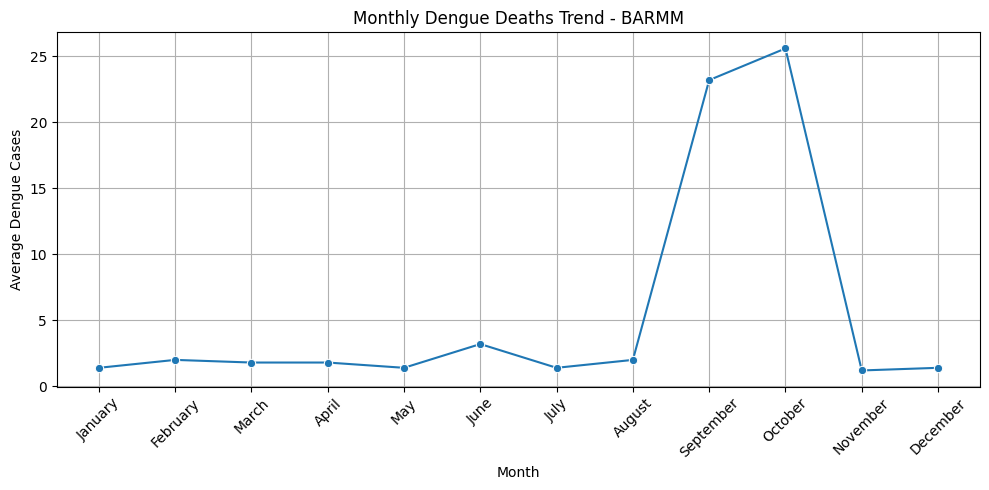

In [23]:

regions = dengue['Region'].unique()

for region in regions:
    region_data = dengue[dengue['Region'] == region]
    monthly_avg = region_data.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
    plt.title(f"Monthly Dengue Deaths Trend - {region}")
    plt.xlabel("Month")
    plt.ylabel("Average Dengue Cases")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()


<h1>Insight 10</h1>
<h3><b>NCR (National Capital Region)</b> consistently recorded the highest number of dengue deaths from August to November, peaking in October. This suggests a high population density and urban factors may contribute significantly to dengue fatality rates in the region.</h3>


<h1>Insight 11</h1>
<h3><b>Region XII</b> had an alarming spike in dengue deaths in September (237) and an even greater peak in October (272.8). This sudden rise highlights a possible outbreak or a failure in early detection and control in these months.</h3>


<h1>Insight 12</h1>
<h3><b>Region VI and VII</b> also exhibited sharp increases during the rainy season, with deaths surging from July to October, reflecting a seasonal pattern that may require focused intervention during mid-year.</h3>

<h1>Insight 13</h1>
<h3><b>Region VI and VII</b> also exhibited sharp increases during the rainy season, with deaths surging from July to October, reflecting a seasonal pattern that may require focused intervention during mid-year.</h3>


<h1>Insight 14</h1>
<h3><b>Regions IV-B, V, and BARMM</b> maintained relatively low dengue death rates throughout the year, suggesting possibly better control efforts, fewer outbreaks, or demographic and environmental factors that naturally limit transmission.</h3>

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1249470394.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_deaths = dengue.groupby(['Year', 'Region'])['Dengue_Deaths'].mean().reset_index()


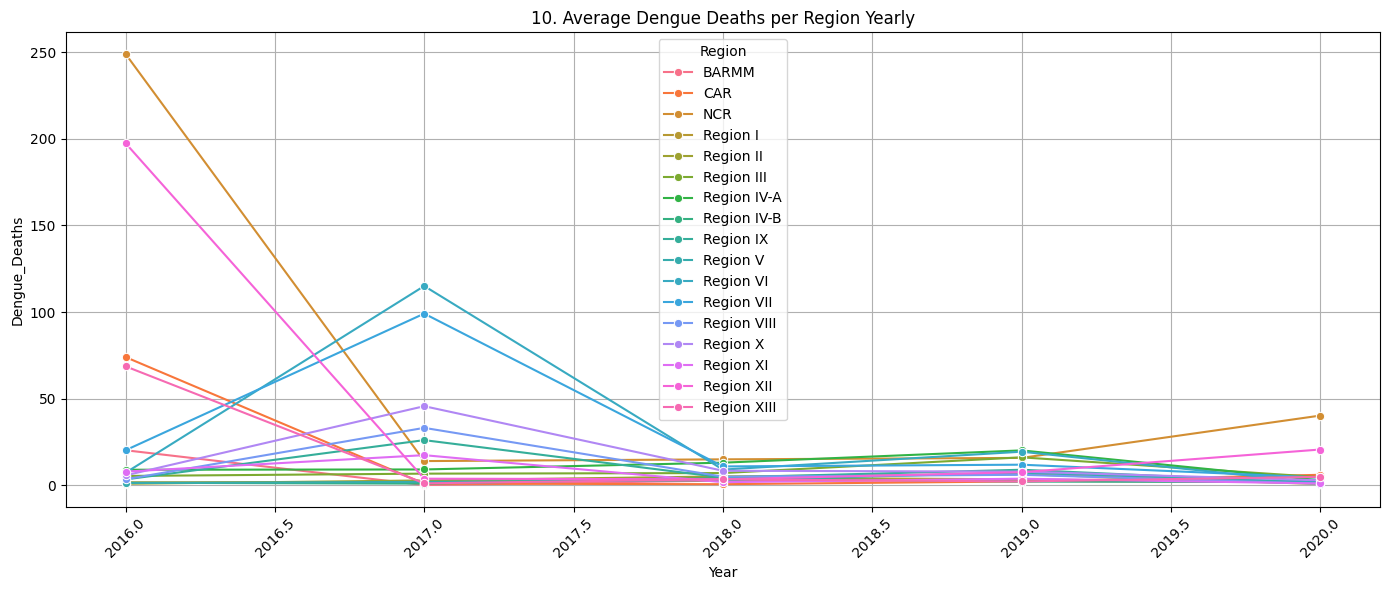

In [33]:
avg_deaths = dengue.groupby(['Year', 'Region'])['Dengue_Deaths'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_deaths, x='Year', y='Dengue_Deaths', hue='Region', marker='o')
plt.title("10. Average Dengue Deaths per Region Yearly")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\2608794149.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_year = dengue.groupby(['Year', 'Month'])['Dengue_Deaths'].sum().reset_index()


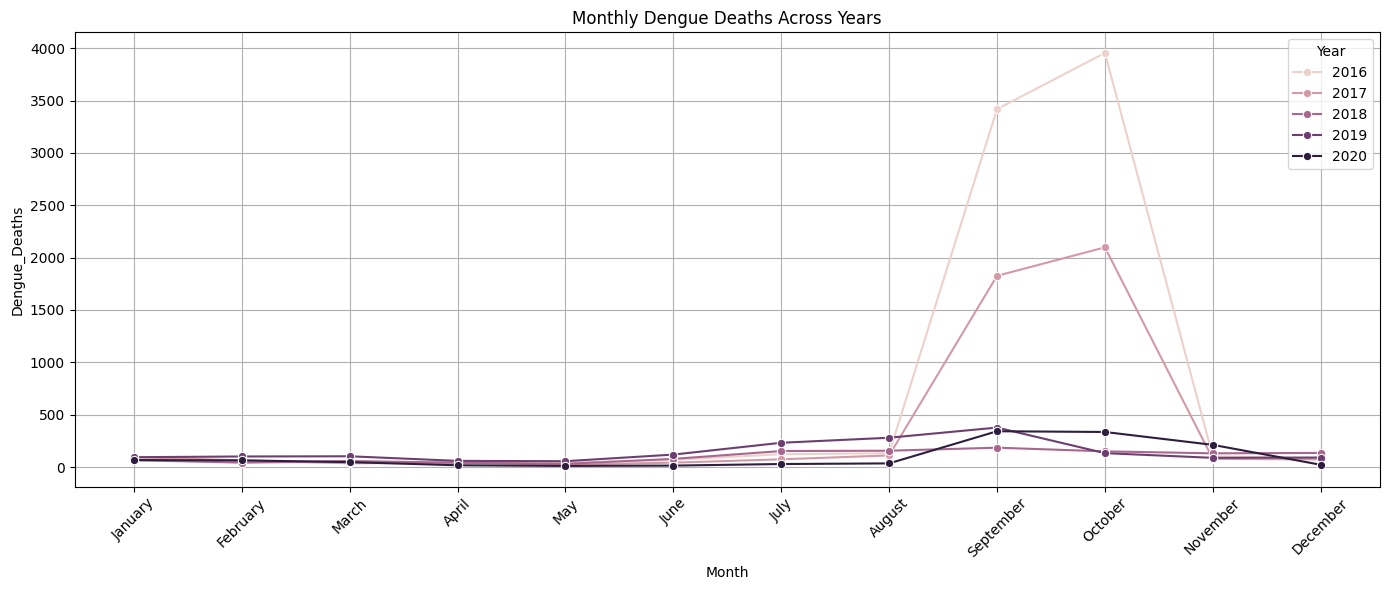

In [39]:

monthly_year = dengue.groupby(['Year', 'Month'])['Dengue_Deaths'].sum().reset_index()
monthly_year['Month'] = pd.Categorical(monthly_year['Month'], categories=month_order, ordered=True)
monthly_year.sort_values(['Year', 'Month'], inplace=True)
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_year, x='Month', y='Dengue_Deaths', hue='Year', marker='o')
plt.title("Monthly Dengue Deaths Across Years")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()   

<h1>Insight 15</h1>
<h3>The graph reveals that 2019 consistently had the highest monthly dengue deaths, peaking from July to September. This confirms 2019 as a year of severe dengue outbreaks across multiple months.</h3>

<h1>Insight 16</h1>
<h3>Very few deaths are recorded from January to May each year, suggesting this period is the ideal time for preventive campaigns before the high-risk season begins.</h3

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\2314349020.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_region_avg = dengue.groupby(['Region', 'Year'])['Dengue_Cases'].mean().reset_index()


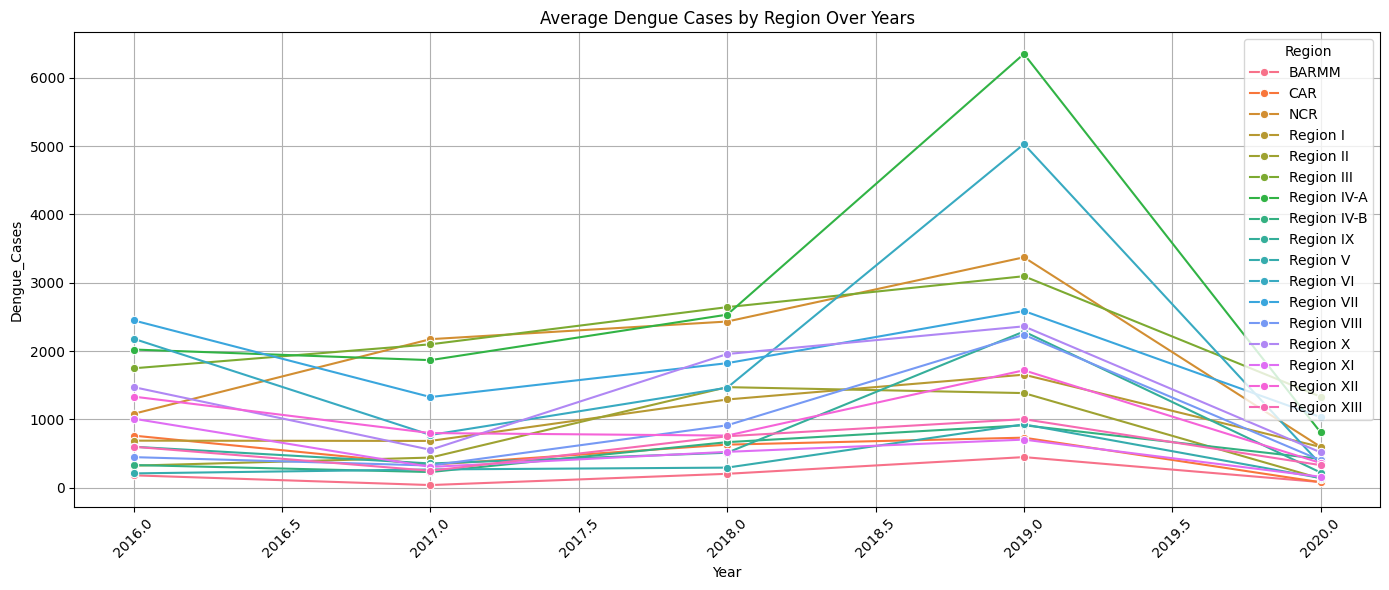

In [40]:
year_region_avg = dengue.groupby(['Region', 'Year'])['Dengue_Cases'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=year_region_avg, x='Year', y='Dengue_Cases', hue='Region', marker='o')
plt.title("Average Dengue Cases by Region Over Years")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\4236352749.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_total_deaths = dengue.groupby('Month')['Dengue_Deaths'].sum().reindex(month_order)


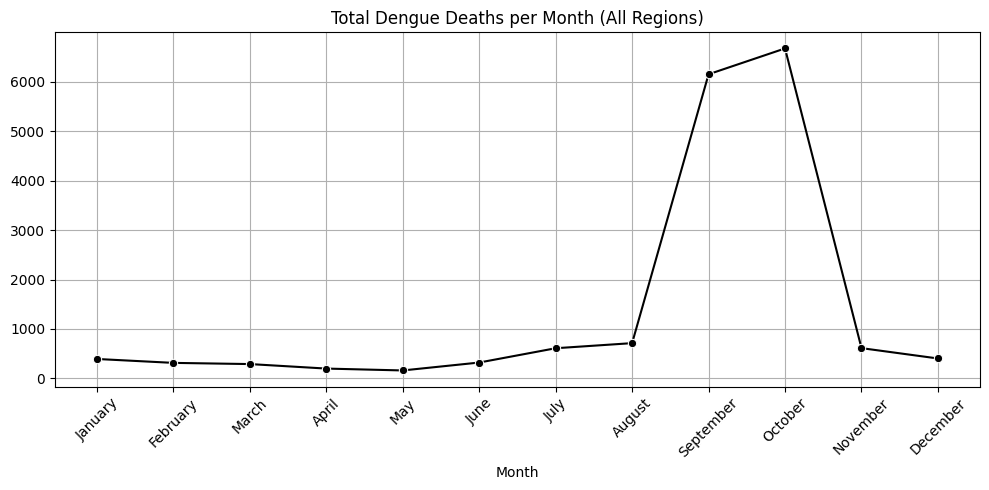

In [37]:
monthly_total_deaths = dengue.groupby('Month')['Dengue_Deaths'].sum().reindex(month_order)
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_total_deaths.index, y=monthly_total_deaths.values, marker='o', color='black')
plt.title("Total Dengue Deaths per Month (All Regions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

<h1>Insight 17</h1>
<h3>Based on the graph and the flow of total dengue deaths each month, from January to May, the number of deaths was low or at its lowest. Starting from June to October, there was an increasing trend in total deaths, followed by a decrease from November to December.</h3>


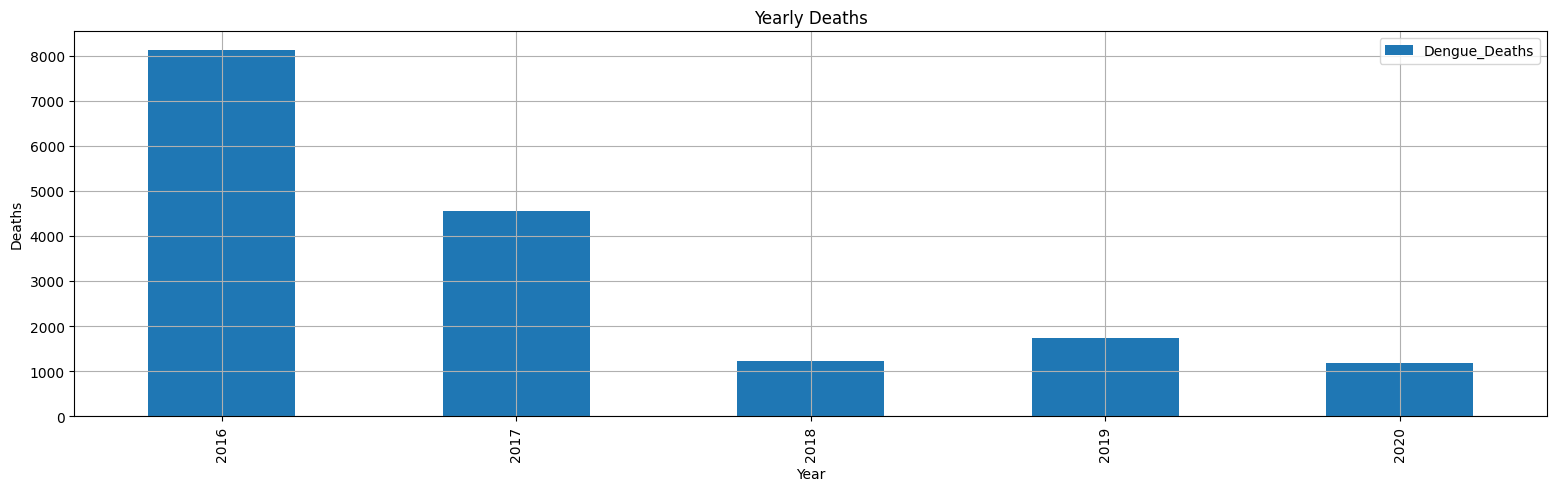

In [42]:
yearly_death = dengue.groupby(["Year"])[["Dengue_Deaths"]].sum()
yearly_death.plot(kind="bar")
plt.gcf().set_size_inches(19,5)
plt.title("Yearly Deaths")
plt.ylabel("Deaths")
plt.grid()
plt.show()


<h1>Insight 18</h1>
<h3>Based on the graph, the year 2016 had the highest number of dengue deaths, with over 8,000 recorded deaths. This accounted for approximately 48.25% of the total dengue deaths from 2016 to 2020.</h3>


C:\Users\DLL-AccountOfficer\AppData\Local\Temp\ipykernel_5340\1771543899.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_death = dengue.groupby(["Region"])[["Dengue_Deaths"]].sum()


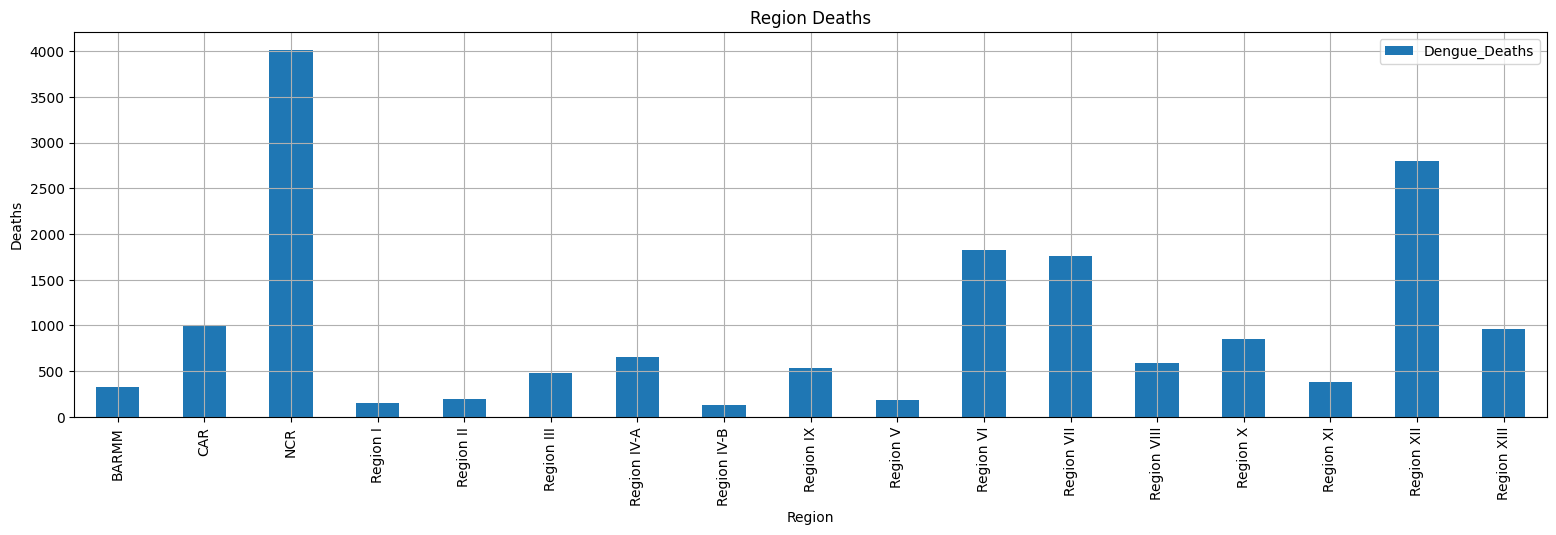

In [43]:
region_death = dengue.groupby(["Region"])[["Dengue_Deaths"]].sum()
region_death.plot(kind="bar")
plt.gcf().set_size_inches(19,5)
plt.title("Region Deaths")
plt.ylabel("Deaths")
plt.grid()
plt.show()


<h1>Insight 19</h1>
<h3>Based on the graph, the National Capital Region (NCR) recorded the highest number of dengue deaths, totaling 4,008. This was followed by Region XII with 2,796 deaths and Region VI with 1,825 deaths, indicating that these areas may have had higher population densities or more severe outbreaks. On the other hand, the regions with the lowest recorded deaths were Region IV-B (130 deaths), Region I (157 deaths), and Region V (185 deaths), suggesting relatively better control or lower incidence rates in these areas. The data highlights the need for more focused health interventions in regions with consistently high fatality rates.</h3>


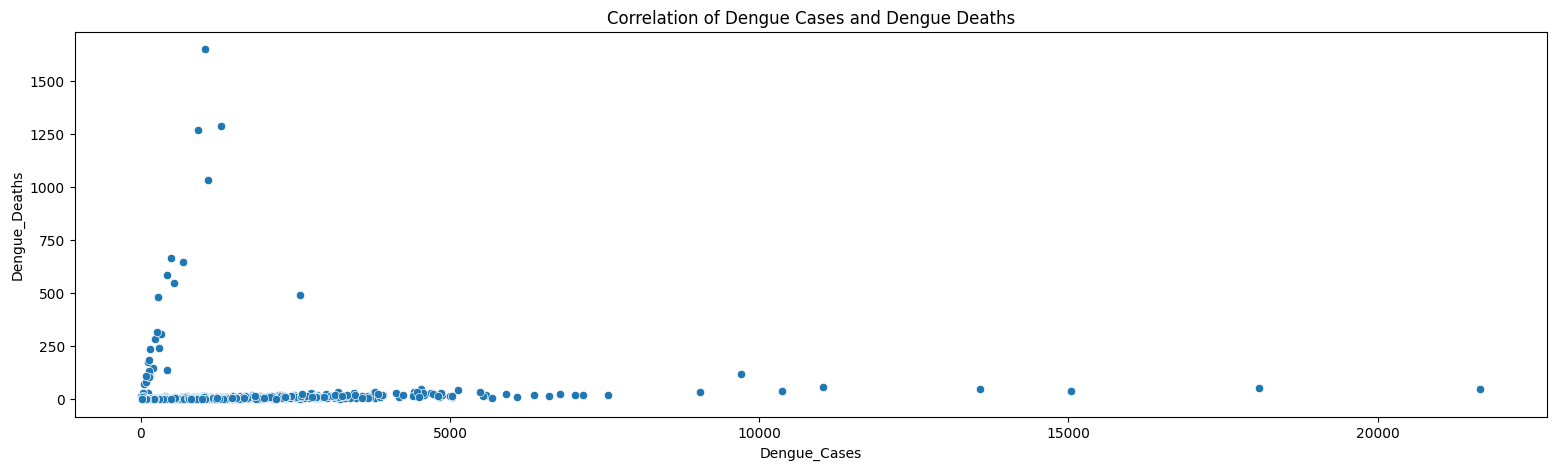

np.float64(0.03832213720419488)

In [56]:
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Dengue_Deaths")
plt.gcf().set_size_inches(19,5)
plt.title("Correlation of Dengue Cases and Dengue Deaths")
plt.show()

cor_deaths_cases = dengue["Dengue_Cases"].corr(dengue["Dengue_Deaths"])
cor_deaths_cases 



<h1>Insight 20</h1>

<h3>Based on the result of 0.038, there is a weak correlation between dengue cases and dengue deaths. It means that an increase in the number of cases does not necessarily result in a proportional increase in the number of deaths.</h3>
